# 0_DataPreprocessing2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [i * 2 for i in plt.rcParams['figure.figsize']]

In [3]:
import preprocessing as pre

In [ ]:
# if change preprocessing file need to reload module here..
import imp
imp.reload(pre)

In [5]:
!head -n 20 Datasets/train_x.csv > Datasets/sample_x.csv
!head -n 20 Datasets/train_y.csv > Datasets/sample_y.csv

In [6]:
data = pre.loadData('Datasets/sample_x.csv')

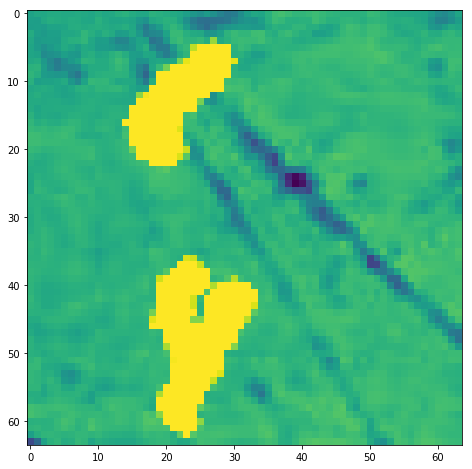

In [7]:
plt.imshow(data[0])

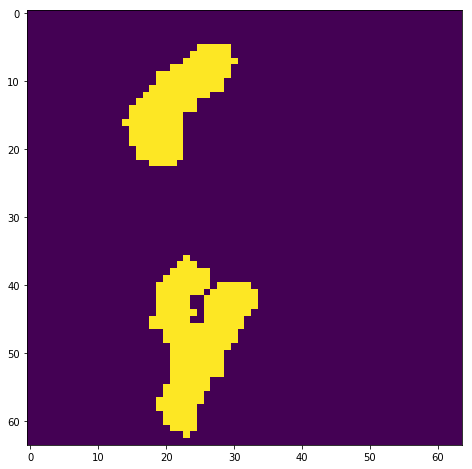

In [8]:
plt.imshow(pre.toBinary(data[0], 240))

# Testing Preprocessing Flows

## originalFlow
- floor_divides with threshold
- clusters touching points together
- gets largest size digit
- scales to fit standardized shape

In [9]:
def originalFlow(img, threshold=255, distance=4, shape=(28,28)):
    binImg = pre.toBinary(img, threshold)
    grps = pre.connectedCluster(binImg, distance)
    sliceBounds = pre.largestBounds([pre.getBounds(grp) for grp in grps])
    digit = pre.sliceImg(binImg, sliceBounds)
    return pre.scaledStretch(digit, shape)

/home/angus/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


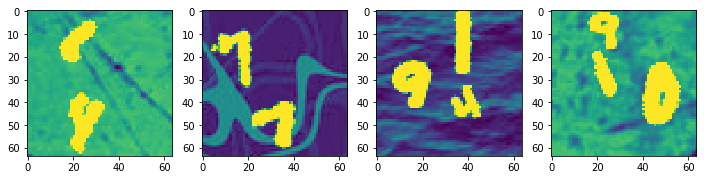

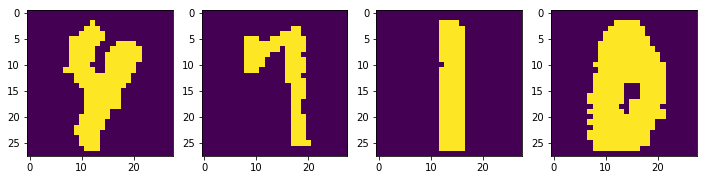

In [10]:
config = {'threshold':235, 'distance':3, 'shape':(28,28)}
pre.displayImgs(data[:4], n_cols=4)
pre.displayImgs([originalFlow(d, **config) for d in data[:4]], n_cols=4)

## origWithSmoothing
- floor_divides with threshold
- clusters touching points together
- gets largest size digit
- scales to fit standardized shape
- adds smoothing

In [11]:
def origWithSmoothing(img, **config):
    orig = originalFlow(img, **config)
    return pre.roundImageBin(orig, 3)

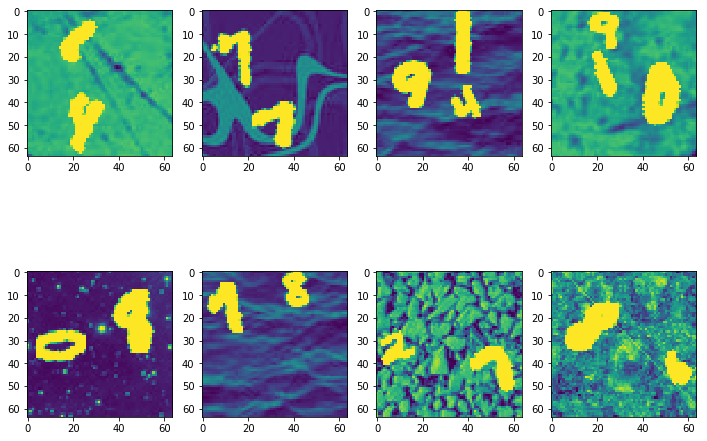

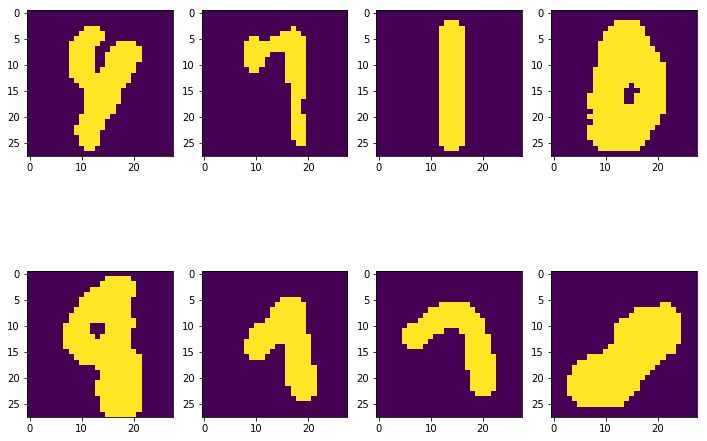

In [12]:
config = {'threshold':235, 'distance':3, 'shape':(28,28)}
pre.displayImgs(data[:8], n_cols=4)
pre.displayImgs([origWithSmoothing(d, **config) for d in data[:8]], n_cols=4)